# Merge trial .dat files into a single .dat file


In [1]:
#%load_ext autoreload
#%autoreload 2

import sys
from spikeA.Dat_file_reader import Dat_file_reader

# This sets up our session lists
%run setup_project.py
print("autpipy sessions: {}, spikeA sessions: {}".format(len(myProject.sessionList),len(sSesList)))

Project name: autopi_ca1
dataPath: /adata/projects/autopi_ca1
dlcModelPath: /adata/models
Reading /adata/projects/autopi_ca1/sessionList
We have 36 testing sessions in the list
See myProject and sSesList objects
autpipy sessions: 36, spikeA sessions: 36


In [2]:
def prepareSpikeASession(sSes):
    sSes.load_parameters_from_files() 
for sSes in sSesList:
    prepareSpikeASession(sSes)

In [3]:
sSesLocal = get_local_sessions(sSesList)
ip=socket.gethostname()
print("{} sessions are local to {}".format(len(sSesLocal),ip))

30 sessions are local to a230-pc73


In [64]:
sSes = sSesLocal[1]

In [3]:
def merge_trial_dat_files(sSes):
    """
    Take the data from trial .dat files and put them all in one large .dat file
    
    We save a Dat_file_reader object in the directory to have information about the original files.
    
    The information in the Dat_file_reader object is needed to go back and forth between trial .dat files and merge .dat file if needed.
    It might be wise to save a copy of these pickles somewhere safe.
    
    """
    dat_files = [ sSes.path+"/"+i+".dat" for i in sSes.trial_names]
    out_file = sSes.path+"/"+sSes.name+".dat"
   
    # create a Dat_file_reader with the trial dat files
    dfr = Dat_file_reader(dat_files,sSes.n_channels)
        
    # save the dfr object so that we can restore the original files from the merge file
    fn = sSes.path+"/"+sSes.name+".trials_Dat_file_reader.pickle"
    print(fn)
    filehandler = open(fn, 'wb') 
    pickle.dump(dfr, filehandler)

    com="cat "+ ' '.join(dat_files)+" > "+out_file
    print("running: " , com)
    os.system(com)
    
    merge_size = os.path.getsize(out_file)
    if merge_size != np.sum(dfr.size_of_files):
        raise ValueError("Problem with size of merged file {}, {},{}".format(out_file,merge_size,np.sum(dfr.size_of_files)))
    else:
        print("File sizes match {}, {},{}".format(out_file,merge_size,np.sum(dfr.size_of_files)))

In [4]:
%time merge_trial_dat_files(sSes)

/adata/projects/autopi_ca1/TYY5622/TYY5622-20092021-0106/TYY5622-20092021-0106.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/TYY5622/TYY5622-20092021-0106/TYY5622-20092021_01.dat /adata/projects/autopi_ca1/TYY5622/TYY5622-20092021-0106/TYY5622-20092021_02.dat /adata/projects/autopi_ca1/TYY5622/TYY5622-20092021-0106/TYY5622-20092021_03.dat /adata/projects/autopi_ca1/TYY5622/TYY5622-20092021-0106/TYY5622-20092021_04.dat /adata/projects/autopi_ca1/TYY5622/TYY5622-20092021-0106/TYY5622-20092021_05.dat /adata/projects/autopi_ca1/TYY5622/TYY5622-20092021-0106/TYY5622-20092021_06.dat > /adata/projects/autopi_ca1/TYY5622/TYY5622-20092021-0106/TYY5622-20092021-0106.dat


ValueError: Problem with size of merged file /adata/projects/autopi_ca1/TYY5622/TYY5622-20092021-0106/TYY5622-20092021-0106.dat, 31457280,49997304000

In [ ]:
for sSes in tqdm(sSesLocal):
    print(sSes.name)
    merge_trial_dat_files(sSes)
    

  0%|                                                    | 0/30 [00:00<?, ?it/s]

mn5824-20112020-0107
/adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/mn5824-20112020-0107.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/mn5824-20112020_01.dat /adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/mn5824-20112020_02.dat /adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/mn5824-20112020_03.dat /adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/mn5824-20112020_04.dat /adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/mn5824-20112020_05.dat /adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/mn5824-20112020_06.dat /adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/mn5824-20112020_07.dat > /adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/mn5824-20112020-0107.dat


  3%|█▎                                       | 1/30 [02:13<1:04:34, 133.61s/it]

File sizes match /adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/mn5824-20112020-0107.dat, 13544102880,13544102880
mn5824-22112020-0107
/adata/projects/autopi_ca1/mn5824/mn5824-22112020-0107/mn5824-22112020-0107.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn5824/mn5824-22112020-0107/mn5824-22112020_01.dat /adata/projects/autopi_ca1/mn5824/mn5824-22112020-0107/mn5824-22112020_02.dat /adata/projects/autopi_ca1/mn5824/mn5824-22112020-0107/mn5824-22112020_03.dat /adata/projects/autopi_ca1/mn5824/mn5824-22112020-0107/mn5824-22112020_04.dat /adata/projects/autopi_ca1/mn5824/mn5824-22112020-0107/mn5824-22112020_05.dat /adata/projects/autopi_ca1/mn5824/mn5824-22112020-0107/mn5824-22112020_06.dat /adata/projects/autopi_ca1/mn5824/mn5824-22112020-0107/mn5824-22112020_07.dat > /adata/projects/autopi_ca1/mn5824/mn5824-22112020-0107/mn5824-22112020-0107.dat


  7%|██▋                                      | 2/30 [04:25<1:01:58, 132.81s/it]

File sizes match /adata/projects/autopi_ca1/mn5824/mn5824-22112020-0107/mn5824-22112020-0107.dat, 13500954720,13500954720
mn5824-24112020-0107
/adata/projects/autopi_ca1/mn5824/mn5824-24112020-0107/mn5824-24112020-0107.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn5824/mn5824-24112020-0107/mn5824-24112020_01.dat /adata/projects/autopi_ca1/mn5824/mn5824-24112020-0107/mn5824-24112020_02.dat /adata/projects/autopi_ca1/mn5824/mn5824-24112020-0107/mn5824-24112020_03.dat /adata/projects/autopi_ca1/mn5824/mn5824-24112020-0107/mn5824-24112020_04.dat /adata/projects/autopi_ca1/mn5824/mn5824-24112020-0107/mn5824-24112020_05.dat /adata/projects/autopi_ca1/mn5824/mn5824-24112020-0107/mn5824-24112020_06.dat /adata/projects/autopi_ca1/mn5824/mn5824-24112020-0107/mn5824-24112020_07.dat > /adata/projects/autopi_ca1/mn5824/mn5824-24112020-0107/mn5824-24112020-0107.dat


 10%|████▎                                      | 3/30 [06:29<57:58, 128.85s/it]

File sizes match /adata/projects/autopi_ca1/mn5824/mn5824-24112020-0107/mn5824-24112020-0107.dat, 13001424480,13001424480
mn5824-02122020-0106
/adata/projects/autopi_ca1/mn5824/mn5824-02122020-0106/mn5824-02122020-0106.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn5824/mn5824-02122020-0106/mn5824-02122020_01.dat /adata/projects/autopi_ca1/mn5824/mn5824-02122020-0106/mn5824-02122020_02.dat /adata/projects/autopi_ca1/mn5824/mn5824-02122020-0106/mn5824-02122020_03.dat /adata/projects/autopi_ca1/mn5824/mn5824-02122020-0106/mn5824-02122020_04.dat /adata/projects/autopi_ca1/mn5824/mn5824-02122020-0106/mn5824-02122020_05.dat /adata/projects/autopi_ca1/mn5824/mn5824-02122020-0106/mn5824-02122020_06.dat > /adata/projects/autopi_ca1/mn5824/mn5824-02122020-0106/mn5824-02122020-0106.dat


 13%|█████▋                                     | 4/30 [08:37<55:34, 128.26s/it]

File sizes match /adata/projects/autopi_ca1/mn5824/mn5824-02122020-0106/mn5824-02122020-0106.dat, 12703474080,12703474080
mn711-28012021-0106
/adata/projects/autopi_ca1/mn711/mn711-28012021-0106/mn711-28012021-0106.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn711/mn711-28012021-0106/mn711-28012021_01.dat /adata/projects/autopi_ca1/mn711/mn711-28012021-0106/mn711-28012021_02.dat /adata/projects/autopi_ca1/mn711/mn711-28012021-0106/mn711-28012021_03.dat /adata/projects/autopi_ca1/mn711/mn711-28012021-0106/mn711-28012021_04.dat /adata/projects/autopi_ca1/mn711/mn711-28012021-0106/mn711-28012021_05.dat /adata/projects/autopi_ca1/mn711/mn711-28012021-0106/mn711-28012021_06.dat > /adata/projects/autopi_ca1/mn711/mn711-28012021-0106/mn711-28012021-0106.dat


 17%|██████▊                                  | 5/30 [11:49<1:02:59, 151.19s/it]

File sizes match /adata/projects/autopi_ca1/mn711/mn711-28012021-0106/mn711-28012021-0106.dat, 21730987200,21730987200
mn711-30012021-0106
/adata/projects/autopi_ca1/mn711/mn711-30012021-0106/mn711-30012021-0106.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn711/mn711-30012021-0106/mn711-30012021_01.dat /adata/projects/autopi_ca1/mn711/mn711-30012021-0106/mn711-30012021_02.dat /adata/projects/autopi_ca1/mn711/mn711-30012021-0106/mn711-30012021_03.dat /adata/projects/autopi_ca1/mn711/mn711-30012021-0106/mn711-30012021_04.dat /adata/projects/autopi_ca1/mn711/mn711-30012021-0106/mn711-30012021_05.dat /adata/projects/autopi_ca1/mn711/mn711-30012021-0106/mn711-30012021_06.dat > /adata/projects/autopi_ca1/mn711/mn711-30012021-0106/mn711-30012021-0106.dat


 20%|████████▏                                | 6/30 [15:33<1:10:28, 176.17s/it]

File sizes match /adata/projects/autopi_ca1/mn711/mn711-30012021-0106/mn711-30012021-0106.dat, 25014974400,25014974400
mn711-31012021-0107
/adata/projects/autopi_ca1/mn711/mn711-31012021-0107/mn711-31012021-0107.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn711/mn711-31012021-0107/mn711-31012021_01.dat /adata/projects/autopi_ca1/mn711/mn711-31012021-0107/mn711-31012021_02.dat /adata/projects/autopi_ca1/mn711/mn711-31012021-0107/mn711-31012021_03.dat /adata/projects/autopi_ca1/mn711/mn711-31012021-0107/mn711-31012021_04.dat /adata/projects/autopi_ca1/mn711/mn711-31012021-0107/mn711-31012021_05.dat /adata/projects/autopi_ca1/mn711/mn711-31012021-0107/mn711-31012021_06.dat /adata/projects/autopi_ca1/mn711/mn711-31012021-0107/mn711-31012021_07.dat > /adata/projects/autopi_ca1/mn711/mn711-31012021-0107/mn711-31012021-0107.dat


 23%|█████████▌                               | 7/30 [20:06<1:19:39, 207.81s/it]

File sizes match /adata/projects/autopi_ca1/mn711/mn711-31012021-0107/mn711-31012021-0107.dat, 29713975200,29713975200
mn711-01022021-0107
/adata/projects/autopi_ca1/mn711/mn711-01022021-0107/mn711-01022021-0107.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn711/mn711-01022021-0107/mn711-01022021_01.dat /adata/projects/autopi_ca1/mn711/mn711-01022021-0107/mn711-01022021_02.dat /adata/projects/autopi_ca1/mn711/mn711-01022021-0107/mn711-01022021_03.dat /adata/projects/autopi_ca1/mn711/mn711-01022021-0107/mn711-01022021_04.dat /adata/projects/autopi_ca1/mn711/mn711-01022021-0107/mn711-01022021_05.dat /adata/projects/autopi_ca1/mn711/mn711-01022021-0107/mn711-01022021_06.dat /adata/projects/autopi_ca1/mn711/mn711-01022021-0107/mn711-01022021_07.dat > /adata/projects/autopi_ca1/mn711/mn711-01022021-0107/mn711-01022021-0107.dat


 27%|██████████▉                              | 8/30 [24:32<1:23:00, 226.38s/it]

File sizes match /adata/projects/autopi_ca1/mn711/mn711-01022021-0107/mn711-01022021-0107.dat, 29707236000,29707236000
mn711-02022021-0108
/adata/projects/autopi_ca1/mn711/mn711-02022021-0108/mn711-02022021-0108.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn711/mn711-02022021-0108/mn711-02022021_01.dat /adata/projects/autopi_ca1/mn711/mn711-02022021-0108/mn711-02022021_02.dat /adata/projects/autopi_ca1/mn711/mn711-02022021-0108/mn711-02022021_03.dat /adata/projects/autopi_ca1/mn711/mn711-02022021-0108/mn711-02022021_04.dat /adata/projects/autopi_ca1/mn711/mn711-02022021-0108/mn711-02022021_05.dat /adata/projects/autopi_ca1/mn711/mn711-02022021-0108/mn711-02022021_06.dat /adata/projects/autopi_ca1/mn711/mn711-02022021-0108/mn711-02022021_07.dat /adata/projects/autopi_ca1/mn711/mn711-02022021-0108/mn711-02022021_08.dat > /adata/projects/autopi_ca1/mn711/mn711-02022021-0108/mn711-02022021-0108.dat


 30%|████████████▎                            | 9/30 [29:12<1:25:03, 243.02s/it]

File sizes match /adata/projects/autopi_ca1/mn711/mn711-02022021-0108/mn711-02022021-0108.dat, 31284302400,31284302400
mn711-03022021-0107
/adata/projects/autopi_ca1/mn711/mn711-03022021-0107/mn711-03022021-0107.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn711/mn711-03022021-0107/mn711-03022021_01.dat /adata/projects/autopi_ca1/mn711/mn711-03022021-0107/mn711-03022021_02.dat /adata/projects/autopi_ca1/mn711/mn711-03022021-0107/mn711-03022021_03.dat /adata/projects/autopi_ca1/mn711/mn711-03022021-0107/mn711-03022021_04.dat /adata/projects/autopi_ca1/mn711/mn711-03022021-0107/mn711-03022021_05.dat /adata/projects/autopi_ca1/mn711/mn711-03022021-0107/mn711-03022021_06.dat /adata/projects/autopi_ca1/mn711/mn711-03022021-0107/mn711-03022021_07.dat > /adata/projects/autopi_ca1/mn711/mn711-03022021-0107/mn711-03022021-0107.dat


 33%|█████████████▎                          | 10/30 [33:39<1:23:29, 250.48s/it]

File sizes match /adata/projects/autopi_ca1/mn711/mn711-03022021-0107/mn711-03022021-0107.dat, 29714068800,29714068800
mn711-04022021-0107
/adata/projects/autopi_ca1/mn711/mn711-04022021-0107/mn711-04022021-0107.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn711/mn711-04022021-0107/mn711-04022021_01.dat /adata/projects/autopi_ca1/mn711/mn711-04022021-0107/mn711-04022021_02.dat /adata/projects/autopi_ca1/mn711/mn711-04022021-0107/mn711-04022021_03.dat /adata/projects/autopi_ca1/mn711/mn711-04022021-0107/mn711-04022021_04.dat /adata/projects/autopi_ca1/mn711/mn711-04022021-0107/mn711-04022021_05.dat /adata/projects/autopi_ca1/mn711/mn711-04022021-0107/mn711-04022021_06.dat /adata/projects/autopi_ca1/mn711/mn711-04022021-0107/mn711-04022021_07.dat > /adata/projects/autopi_ca1/mn711/mn711-04022021-0107/mn711-04022021-0107.dat


 37%|██████████████▋                         | 11/30 [38:29<1:23:09, 262.62s/it]

File sizes match /adata/projects/autopi_ca1/mn711/mn711-04022021-0107/mn711-04022021-0107.dat, 31274006400,31274006400
mn2739-11022021-0107
/adata/projects/autopi_ca1/mn2739/mn2739-11022021-0107/mn2739-11022021-0107.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn2739/mn2739-11022021-0107/mn2739-11022021_01.dat /adata/projects/autopi_ca1/mn2739/mn2739-11022021-0107/mn2739-11022021_02.dat /adata/projects/autopi_ca1/mn2739/mn2739-11022021-0107/mn2739-11022021_03.dat /adata/projects/autopi_ca1/mn2739/mn2739-11022021-0107/mn2739-11022021_04.dat /adata/projects/autopi_ca1/mn2739/mn2739-11022021-0107/mn2739-11022021_05.dat /adata/projects/autopi_ca1/mn2739/mn2739-11022021-0107/mn2739-11022021_06.dat /adata/projects/autopi_ca1/mn2739/mn2739-11022021-0107/mn2739-11022021_07.dat > /adata/projects/autopi_ca1/mn2739/mn2739-11022021-0107/mn2739-11022021-0107.dat


 40%|████████████████                        | 12/30 [42:47<1:18:20, 261.16s/it]

File sizes match /adata/projects/autopi_ca1/mn2739/mn2739-11022021-0107/mn2739-11022021-0107.dat, 24917869600,24917869600
mn2739-15022021-0105
/adata/projects/autopi_ca1/mn2739/mn2739-15022021-0105/mn2739-15022021-0105.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn2739/mn2739-15022021-0105/mn2739-15022021_01.dat /adata/projects/autopi_ca1/mn2739/mn2739-15022021-0105/mn2739-15022021_02.dat /adata/projects/autopi_ca1/mn2739/mn2739-15022021-0105/mn2739-15022021_03.dat /adata/projects/autopi_ca1/mn2739/mn2739-15022021-0105/mn2739-15022021_04.dat /adata/projects/autopi_ca1/mn2739/mn2739-15022021-0105/mn2739-15022021_05.dat > /adata/projects/autopi_ca1/mn2739/mn2739-15022021-0105/mn2739-15022021-0105.dat


 43%|█████████████████▎                      | 13/30 [45:55<1:07:41, 238.90s/it]

File sizes match /adata/projects/autopi_ca1/mn2739/mn2739-15022021-0105/mn2739-15022021-0105.dat, 17408133600,17408133600
mn2739-16022021-0106
/adata/projects/autopi_ca1/mn2739/mn2739-16022021-0106/mn2739-16022021-0106.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn2739/mn2739-16022021-0106/mn2739-16022021_01.dat /adata/projects/autopi_ca1/mn2739/mn2739-16022021-0106/mn2739-16022021_02.dat /adata/projects/autopi_ca1/mn2739/mn2739-16022021-0106/mn2739-16022021_03.dat /adata/projects/autopi_ca1/mn2739/mn2739-16022021-0106/mn2739-16022021_04.dat /adata/projects/autopi_ca1/mn2739/mn2739-16022021-0106/mn2739-16022021_05.dat /adata/projects/autopi_ca1/mn2739/mn2739-16022021-0106/mn2739-16022021_06.dat > /adata/projects/autopi_ca1/mn2739/mn2739-16022021-0106/mn2739-16022021-0106.dat


 47%|██████████████████▋                     | 14/30 [49:51<1:03:27, 237.96s/it]

File sizes match /adata/projects/autopi_ca1/mn2739/mn2739-16022021-0106/mn2739-16022021-0106.dat, 22178540800,22178540800
mn2739-17022021-0106
/adata/projects/autopi_ca1/mn2739/mn2739-17022021-0106/mn2739-17022021-0106.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn2739/mn2739-17022021-0106/mn2739-17022021_01.dat /adata/projects/autopi_ca1/mn2739/mn2739-17022021-0106/mn2739-17022021_02.dat /adata/projects/autopi_ca1/mn2739/mn2739-17022021-0106/mn2739-17022021_03.dat /adata/projects/autopi_ca1/mn2739/mn2739-17022021-0106/mn2739-17022021_04.dat /adata/projects/autopi_ca1/mn2739/mn2739-17022021-0106/mn2739-17022021_05.dat /adata/projects/autopi_ca1/mn2739/mn2739-17022021-0106/mn2739-17022021_06.dat > /adata/projects/autopi_ca1/mn2739/mn2739-17022021-0106/mn2739-17022021-0106.dat


 50%|████████████████████                    | 15/30 [54:06<1:00:46, 243.12s/it]

File sizes match /adata/projects/autopi_ca1/mn2739/mn2739-17022021-0106/mn2739-17022021-0106.dat, 23176015200,23176015200
mn2739-21022021-0106
/adata/projects/autopi_ca1/mn2739/mn2739-21022021-0106/mn2739-21022021-0106.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn2739/mn2739-21022021-0106/mn2739-21022021_01.dat /adata/projects/autopi_ca1/mn2739/mn2739-21022021-0106/mn2739-21022021_02.dat /adata/projects/autopi_ca1/mn2739/mn2739-21022021-0106/mn2739-21022021_03.dat /adata/projects/autopi_ca1/mn2739/mn2739-21022021-0106/mn2739-21022021_04.dat /adata/projects/autopi_ca1/mn2739/mn2739-21022021-0106/mn2739-21022021_05.dat /adata/projects/autopi_ca1/mn2739/mn2739-21022021-0106/mn2739-21022021_06.dat > /adata/projects/autopi_ca1/mn2739/mn2739-21022021-0106/mn2739-21022021-0106.dat


 53%|██████████████████████▍                   | 16/30 [58:46<59:18, 254.20s/it]

File sizes match /adata/projects/autopi_ca1/mn2739/mn2739-21022021-0106/mn2739-21022021-0106.dat, 24945991200,24945991200
mn3246-09042021-0106
/adata/projects/autopi_ca1/mn3246/mn3246-09042021-0106/mn3246-09042021-0106.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn3246/mn3246-09042021-0106/mn3246-09042021_01.dat /adata/projects/autopi_ca1/mn3246/mn3246-09042021-0106/mn3246-09042021_02.dat /adata/projects/autopi_ca1/mn3246/mn3246-09042021-0106/mn3246-09042021_03.dat /adata/projects/autopi_ca1/mn3246/mn3246-09042021-0106/mn3246-09042021_04.dat /adata/projects/autopi_ca1/mn3246/mn3246-09042021-0106/mn3246-09042021_05.dat /adata/projects/autopi_ca1/mn3246/mn3246-09042021-0106/mn3246-09042021_06.dat > /adata/projects/autopi_ca1/mn3246/mn3246-09042021-0106/mn3246-09042021-0106.dat


 57%|█████████████████████▌                | 17/30 [1:04:47<1:02:03, 286.40s/it]

File sizes match /adata/projects/autopi_ca1/mn3246/mn3246-09042021-0106/mn3246-09042021-0106.dat, 26028756000,26028756000
mn3246-10042021-0106
/adata/projects/autopi_ca1/mn3246/mn3246-10042021-0106/mn3246-10042021-0106.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn3246/mn3246-10042021-0106/mn3246-10042021_01.dat /adata/projects/autopi_ca1/mn3246/mn3246-10042021-0106/mn3246-10042021_02.dat /adata/projects/autopi_ca1/mn3246/mn3246-10042021-0106/mn3246-10042021_03.dat /adata/projects/autopi_ca1/mn3246/mn3246-10042021-0106/mn3246-10042021_04.dat /adata/projects/autopi_ca1/mn3246/mn3246-10042021-0106/mn3246-10042021_05.dat /adata/projects/autopi_ca1/mn3246/mn3246-10042021-0106/mn3246-10042021_06.dat > /adata/projects/autopi_ca1/mn3246/mn3246-10042021-0106/mn3246-10042021-0106.dat


 60%|██████████████████████▊               | 18/30 [1:10:41<1:01:22, 306.86s/it]

File sizes match /adata/projects/autopi_ca1/mn3246/mn3246-10042021-0106/mn3246-10042021-0106.dat, 25020777600,25020777600
mn3246-12042021-0106
/adata/projects/autopi_ca1/mn3246/mn3246-12042021-0106/mn3246-12042021-0106.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn3246/mn3246-12042021-0106/mn3246-12042021_01.dat /adata/projects/autopi_ca1/mn3246/mn3246-12042021-0106/mn3246-12042021_02.dat /adata/projects/autopi_ca1/mn3246/mn3246-12042021-0106/mn3246-12042021_03.dat /adata/projects/autopi_ca1/mn3246/mn3246-12042021-0106/mn3246-12042021_04.dat /adata/projects/autopi_ca1/mn3246/mn3246-12042021-0106/mn3246-12042021_05.dat /adata/projects/autopi_ca1/mn3246/mn3246-12042021-0106/mn3246-12042021_06.dat > /adata/projects/autopi_ca1/mn3246/mn3246-12042021-0106/mn3246-12042021-0106.dat


 63%|████████████████████████              | 19/30 [1:17:01<1:00:14, 328.61s/it]

File sizes match /adata/projects/autopi_ca1/mn3246/mn3246-12042021-0106/mn3246-12042021-0106.dat, 24721632000,24721632000
mn3246-14042021-0106
/adata/projects/autopi_ca1/mn3246/mn3246-14042021-0106/mn3246-14042021-0106.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn3246/mn3246-14042021-0106/mn3246-14042021_01.dat /adata/projects/autopi_ca1/mn3246/mn3246-14042021-0106/mn3246-14042021_02.dat /adata/projects/autopi_ca1/mn3246/mn3246-14042021-0106/mn3246-14042021_03.dat /adata/projects/autopi_ca1/mn3246/mn3246-14042021-0106/mn3246-14042021_04.dat /adata/projects/autopi_ca1/mn3246/mn3246-14042021-0106/mn3246-14042021_05.dat /adata/projects/autopi_ca1/mn3246/mn3246-14042021-0106/mn3246-14042021_06.dat > /adata/projects/autopi_ca1/mn3246/mn3246-14042021-0106/mn3246-14042021-0106.dat


 67%|██████████████████████████▋             | 20/30 [1:23:13<56:56, 341.67s/it]

File sizes match /adata/projects/autopi_ca1/mn3246/mn3246-14042021-0106/mn3246-14042021-0106.dat, 25021432800,25021432800
mn1173-02052021-0107
/adata/projects/autopi_ca1/mn1173/mn1173-02052021-0107/mn1173-02052021-0107.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn1173/mn1173-02052021-0107/mn1173-02052021_01.dat /adata/projects/autopi_ca1/mn1173/mn1173-02052021-0107/mn1173-02052021_02.dat /adata/projects/autopi_ca1/mn1173/mn1173-02052021-0107/mn1173-02052021_03.dat /adata/projects/autopi_ca1/mn1173/mn1173-02052021-0107/mn1173-02052021_04.dat /adata/projects/autopi_ca1/mn1173/mn1173-02052021-0107/mn1173-02052021_05.dat /adata/projects/autopi_ca1/mn1173/mn1173-02052021-0107/mn1173-02052021_06.dat /adata/projects/autopi_ca1/mn1173/mn1173-02052021-0107/mn1173-02052021_07.dat > /adata/projects/autopi_ca1/mn1173/mn1173-02052021-0107/mn1173-02052021-0107.dat


 70%|████████████████████████████            | 21/30 [1:31:52<59:14, 394.90s/it]

File sizes match /adata/projects/autopi_ca1/mn1173/mn1173-02052021-0107/mn1173-02052021-0107.dat, 58961895840,58961895840
mn1173-06052021-0107
/adata/projects/autopi_ca1/mn1173/mn1173-06052021-0107/mn1173-06052021-0107.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn1173/mn1173-06052021-0107/mn1173-06052021_01.dat /adata/projects/autopi_ca1/mn1173/mn1173-06052021-0107/mn1173-06052021_02.dat /adata/projects/autopi_ca1/mn1173/mn1173-06052021-0107/mn1173-06052021_03.dat /adata/projects/autopi_ca1/mn1173/mn1173-06052021-0107/mn1173-06052021_04.dat /adata/projects/autopi_ca1/mn1173/mn1173-06052021-0107/mn1173-06052021_05.dat /adata/projects/autopi_ca1/mn1173/mn1173-06052021-0107/mn1173-06052021_06.dat /adata/projects/autopi_ca1/mn1173/mn1173-06052021-0107/mn1173-06052021_07.dat > /adata/projects/autopi_ca1/mn1173/mn1173-06052021-0107/mn1173-06052021-0107.dat


 73%|█████████████████████████████▎          | 22/30 [1:39:43<55:41, 417.67s/it]

File sizes match /adata/projects/autopi_ca1/mn1173/mn1173-06052021-0107/mn1173-06052021-0107.dat, 52765128000,52765128000
mn1173-08052021-0107
/adata/projects/autopi_ca1/mn1173/mn1173-08052021-0107/mn1173-08052021-0107.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn1173/mn1173-08052021-0107/mn1173-08052021_01.dat /adata/projects/autopi_ca1/mn1173/mn1173-08052021-0107/mn1173-08052021_02.dat /adata/projects/autopi_ca1/mn1173/mn1173-08052021-0107/mn1173-08052021_03.dat /adata/projects/autopi_ca1/mn1173/mn1173-08052021-0107/mn1173-08052021_04.dat /adata/projects/autopi_ca1/mn1173/mn1173-08052021-0107/mn1173-08052021_05.dat /adata/projects/autopi_ca1/mn1173/mn1173-08052021-0107/mn1173-08052021_06.dat /adata/projects/autopi_ca1/mn1173/mn1173-08052021-0107/mn1173-08052021_07.dat > /adata/projects/autopi_ca1/mn1173/mn1173-08052021-0107/mn1173-08052021-0107.dat


 77%|██████████████████████████████▋         | 23/30 [1:47:34<50:37, 433.86s/it]

File sizes match /adata/projects/autopi_ca1/mn1173/mn1173-08052021-0107/mn1173-08052021-0107.dat, 51752736000,51752736000
mn1173-09052021-0108
/adata/projects/autopi_ca1/mn1173/mn1173-09052021-0108/mn1173-09052021-0108.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn1173/mn1173-09052021-0108/mn1173-09052021_01.dat /adata/projects/autopi_ca1/mn1173/mn1173-09052021-0108/mn1173-09052021_02.dat /adata/projects/autopi_ca1/mn1173/mn1173-09052021-0108/mn1173-09052021_03.dat /adata/projects/autopi_ca1/mn1173/mn1173-09052021-0108/mn1173-09052021_04.dat /adata/projects/autopi_ca1/mn1173/mn1173-09052021-0108/mn1173-09052021_05.dat /adata/projects/autopi_ca1/mn1173/mn1173-09052021-0108/mn1173-09052021_06.dat /adata/projects/autopi_ca1/mn1173/mn1173-09052021-0108/mn1173-09052021_07.dat /adata/projects/autopi_ca1/mn1173/mn1173-09052021-0108/mn1173-09052021_08.dat > /adata/projects/autopi_ca1/mn1173/mn1173-09052021-0108/mn1173-09052021-0108.dat


 80%|████████████████████████████████        | 24/30 [1:57:00<47:21, 473.57s/it]

File sizes match /adata/projects/autopi_ca1/mn1173/mn1173-09052021-0108/mn1173-09052021-0108.dat, 60647667840,60647667840
mn1173-11052021-0108
/adata/projects/autopi_ca1/mn1173/mn1173-11052021-0108/mn1173-11052021-0108.trials_Dat_file_reader.pickle
running:  cat /adata/projects/autopi_ca1/mn1173/mn1173-11052021-0108/mn1173-11052021_01.dat /adata/projects/autopi_ca1/mn1173/mn1173-11052021-0108/mn1173-11052021_02.dat /adata/projects/autopi_ca1/mn1173/mn1173-11052021-0108/mn1173-11052021_03.dat /adata/projects/autopi_ca1/mn1173/mn1173-11052021-0108/mn1173-11052021_04.dat /adata/projects/autopi_ca1/mn1173/mn1173-11052021-0108/mn1173-11052021_05.dat /adata/projects/autopi_ca1/mn1173/mn1173-11052021-0108/mn1173-11052021_06.dat /adata/projects/autopi_ca1/mn1173/mn1173-11052021-0108/mn1173-11052021_07.dat /adata/projects/autopi_ca1/mn1173/mn1173-11052021-0108/mn1173-11052021_08.dat > /adata/projects/autopi_ca1/mn1173/mn1173-11052021-0108/mn1173-11052021-0108.dat


In [63]:
def recover_trial_dat_file(sSes,out_file_name = "new.dat", trial_no = 0):
    """
    Read the merged .dat file and extract a trial .dat file from it.
    
    To get the samples of a trial, we use the Dat_file_reader object that was saved when creating the merged .dat file
    
    I used the linux command diff to make sure this recover_trial_dat_file and merge_trial_dat_files() are working as expected.
    
    Arguments:
    sSes : spikeA session
    out_file_name: output file name
    trial_no: index of trial to recover from merged file (starts at 0)
    """
    
    # get the pickle trial Dat_file_reader
    fn = sSes.path+"/"+sSes.name+".trials_Dat_file_reader.pickle"
    filehandler = open(fn, 'rb') 
    dfr = pickle.load(filehandler)
    
    # check that we have a merged file
    fn = sSes.path+"/"+sSes.name+".dat"
    if os.path.exists(fn) == False:
        raise ValueError("{} does not exist".format(fn))
        
    dfr_merged = Dat_file_reader([fn],dfr.n_channels)
    
    # check that this trial_no exists
    if trial_no > len(dfr.file_names)-1:
        raise ValueError("trial_no is out of range: {} but max is {}".format(trial_no,len(dfr.file_names)-1))
    print("Recovering {}".format(dfr.file_names[trial_no]))
        
    # get the beginning and end of the file
    b = dfr.files_first_sample[trial_no]
    e = dfr.files_last_sample[trial_no]+1
    
    # get the data into memory (hopefully it fits into memory)
    print("reading from {} to {}".format(b,e))
    dat_block = dfr_merged.get_data_one_block(b,e,np.arange(dfr.n_channels))
    print("data loaded: ",dat_block.shape,dat_block.dtype)
    
    # save the block to a .dat file
    fn = sSes.path+"/"+out_file_name
    print("save to",fn)
    dat_block.T.tofile(fn)
    
    return

recover_trial_dat_file(sSes,trial_no=6)
    

Recovering /adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/mn5824-20112020_07.dat
reading from 181138320 to 205213680


ValueError: end_sample should not be larger than the total number of samples

In [56]:
f1 = "/adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/mn5824-20112020_02.dat"
f2 = "/adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/new.dat"

In [57]:
dfr1 = Dat_file_reader([f1],sSes.n_channels)
dfr2 = Dat_file_reader([f2],sSes.n_channels)

In [58]:
bl1  = dfr1.get_data_one_block(0,20000,np.arange(dfr1.n_channels))
bl2  = dfr2.get_data_one_block(0,20000,np.arange(dfr1.n_channels))

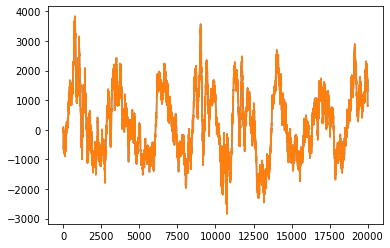

In [59]:
plt.plot(bl1[0])
plt.plot(bl2[0])